# O2 O2TV dataset sandbox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path="/Users/td/Data/O2/STB_reboots_hourly.csv"
data = pd.read_csv(path,parse_dates=["Timestamp"],index_col=["Timestamp"])

In [3]:
data.head(5) #it shows 5 rows of the table

,Count
Timestamp,
2020-02-21 12:00:00,8072.66667
2020-02-21 15:00:00,8519.66667
2020-02-21 18:00:00,11052.00000
2020-02-21 21:00:00,6377.33333
2020-02-22 00:00:00,7159.33333


In [4]:
data.size

125

In [5]:
data.Count[0] #it shows first row of the column Count

8072.6666700000005

In [6]:
type(data.Count[0]) #it shows data type of the first row of the column Count

numpy.float64

In [7]:
data.index #it shows index of the table data

DatetimeIndex(['2020-02-21 12:00:00', '2020-02-21 15:00:00',
               '2020-02-21 18:00:00', '2020-02-21 21:00:00',
               '2020-02-22 00:00:00', '2020-02-22 03:00:00',
               '2020-02-22 06:00:00', '2020-02-22 09:00:00',
               '2020-02-22 12:00:00', '2020-02-22 15:00:00',
               ...
               '2020-03-06 21:00:00', '2020-03-07 00:00:00',
               '2020-03-07 03:00:00', '2020-03-07 06:00:00',
               '2020-03-07 09:00:00', '2020-03-07 12:00:00',
               '2020-03-07 15:00:00', '2020-03-07 18:00:00',
               '2020-03-07 21:00:00', '2020-03-08 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=125, freq=None)

In [8]:
data["2020-03-01"] #it shows data of the given day

,Count
Timestamp,
2020-03-01 00:00:00,7198.66667
2020-03-01 03:00:00,6625.33333
2020-03-01 06:00:00,8799.33333
2020-03-01 09:00:00,10982.00000
2020-03-01 12:00:00,10948.00000
2020-03-01 15:00:00,11778.66667
2020-03-01 18:00:00,12377.66667
2020-03-01 21:00:00,9529.33333


In [9]:
data["2020-03-01"].Count.mean() #it counts mean of the column Count in the given day

9779.875

In [10]:
data["2020-02-29":"2020-03-01"] #it shows data of the time interval specified in the brackets

,Count
Timestamp,
2020-02-29 00:00:00,6683.66667
2020-02-29 03:00:00,6990.33333
2020-02-29 06:00:00,8960.33333
2020-02-29 09:00:00,10449.00000
2020-02-29 12:00:00,11021.66667
2020-02-29 15:00:00,12757.00000
2020-02-29 18:00:00,12283.66667
2020-02-29 21:00:00,9338.66667
2020-03-01 00:00:00,7198.66667


In [11]:
data.describe()

,Count
count,125.000000
mean,9754.600000
std,3509.293191
min,3012.666670
25%,7996.666670
50%,9152.666670
75%,10759.000000
max,28465.666670


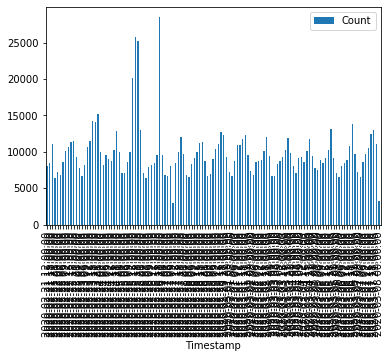

In [12]:
data.plot.bar()

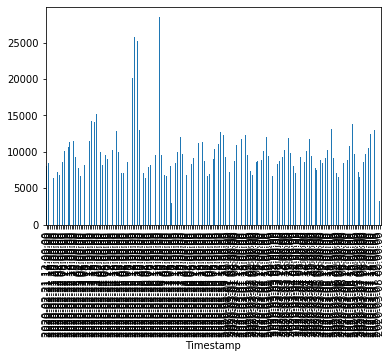

In [13]:
data.Count.resample('2H').mean().plot(kind="bar") #it shows data from column Count agregated (resampled) by given time period and it plots it as a bar chart

In [14]:
data.Count.resample('5H').mean()

Timestamp
2020-02-21 10:00:00     8072.666670
2020-02-21 15:00:00     9785.833335
2020-02-21 20:00:00     6768.333330
2020-02-22 01:00:00     6755.333330
2020-02-22 06:00:00     9413.000000
                           ...     
2020-03-07 00:00:00     6918.833330
2020-03-07 05:00:00     9126.166665
2020-03-07 10:00:00    10533.666670
2020-03-07 15:00:00    12700.166670
2020-03-07 20:00:00     7161.500000
Freq: 5H, Name: Count, Length: 75, dtype: float64

In [15]:
type(data.index[1])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
(data['Ticks']=range(0,len(data.index.values)))

In [17]:
data_daily=data.Count.resample('D').mean()

In [18]:
data_daily.head()

Timestamp
2020-02-21     8505.416667
2020-02-22     9441.416666
2020-02-23    11036.416668
2020-02-24     9832.958333
2020-02-25    14598.625000
Freq: D, Name: Count, dtype: float64

In [27]:
data['Date']=data.index.values

In [28]:
type(data.Date)

pandas.core.series.Series

In [29]:
data['Hour']=data.Date.dt.hour

In [30]:
data.head()

,Count,Ticks,Date,Hour
Timestamp,,,,
2020-02-21 12:00:00,8072.66667,0,2020-02-21 12:00:00,12
2020-02-21 15:00:00,8519.66667,1,2020-02-21 15:00:00,15
2020-02-21 18:00:00,11052.00000,2,2020-02-21 18:00:00,18
2020-02-21 21:00:00,6377.33333,3,2020-02-21 21:00:00,21
2020-02-22 00:00:00,7159.33333,4,2020-02-22 00:00:00,0


In [ ]:
hours=data.groupby('Hour').Count.mean()
hours

In [ ]:
hours=hours[data.Hour]

In [ ]:
newdata=pd.merge(data,hours,on='Hour',how='right')
print(newdata)

In [ ]:
newdata['Diff']=newdata.Count_x-newdata.Count_y

In [ ]:
newdata.Diff.plot(kind='bar')

In [ ]:
newdata.head()

In [ ]:
newdata.loc[:,['Count_x','Count_y']]